In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pylab as plt

import numpy as np
from tierpsy_features.events import _get_pulses_indexes
from tierpsy_features.turns import find_turns

features_file = '/Users/ajaver/OneDrive - Imperial College London/tierpsy_features/test_data/multiworm/MY16_worms5_food1-10_Set5_Pos4_Ch1_02062017_131004_featuresN.hdf5'
#features_file = '/Users/ajaver/OneDrive - Imperial College London/tierpsy_features/test_data/multiworm/170817_matdeve_exp7co1_12_Set0_Pos0_Ch1_17082017_140001_featuresN.hdf5'

masked_file = features_file.replace('_featuresN', '')
with pd.HDFStore(features_file, 'r') as fid:
    blob_features = fid['/blob_features']
    trajectories_data = fid['/trajectories_data']
    timeseries_features = fid['/timeseries_features']
    aux_features = fid['/aux_features']

    fps = fid.get_storer('/trajectories_data').attrs['fps']
    good = trajectories_data['skeleton_id']>=0
    trajectories_data = trajectories_data[good]
    blob_features = blob_features[good]

/Users/ajaver/miniconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


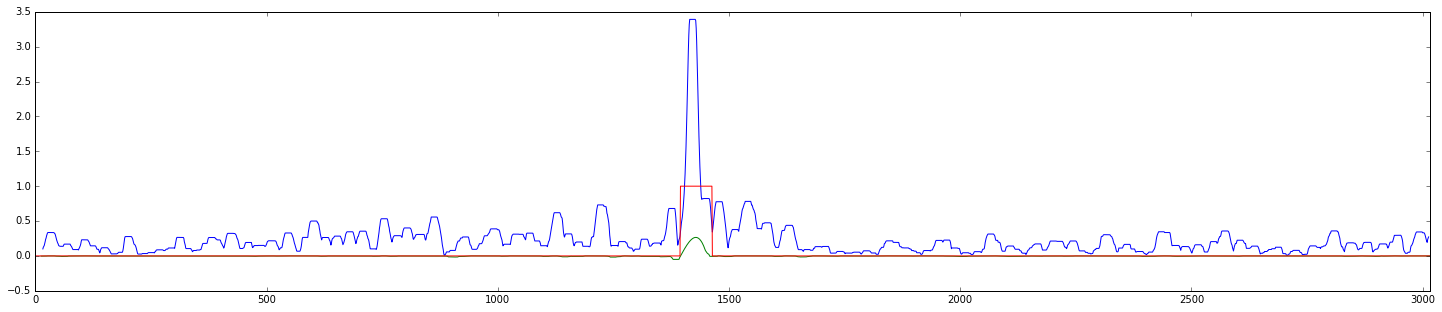

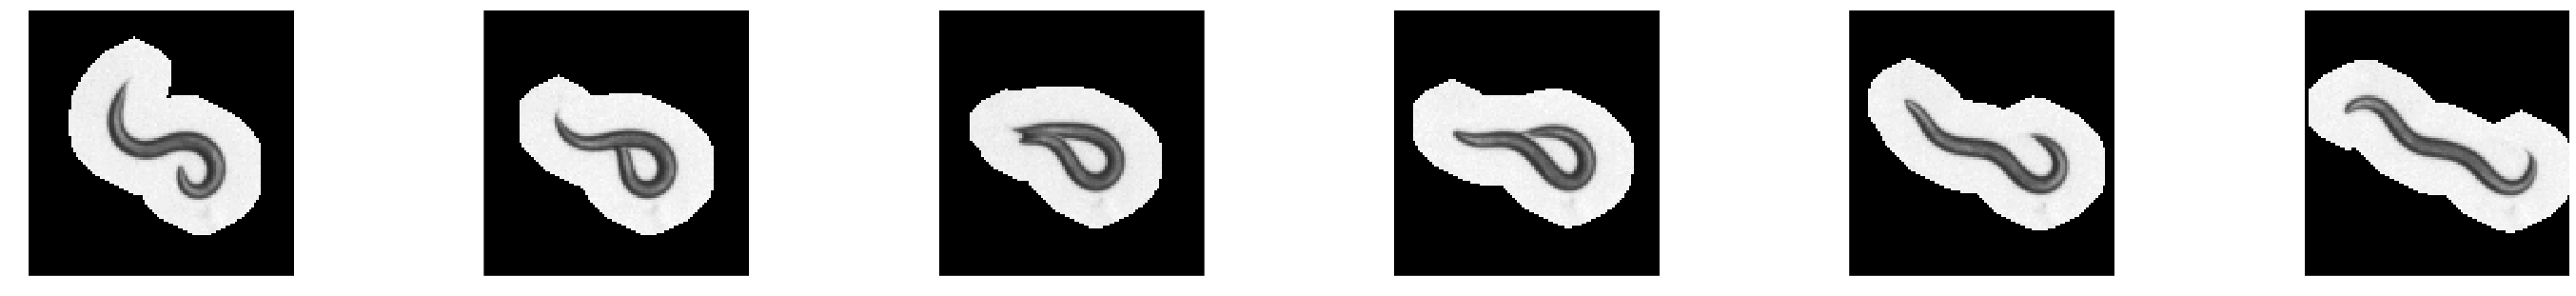

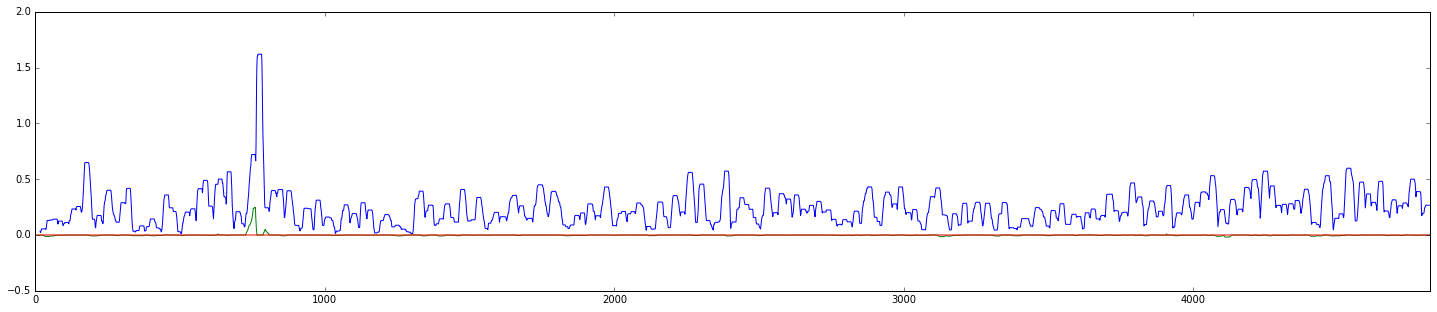

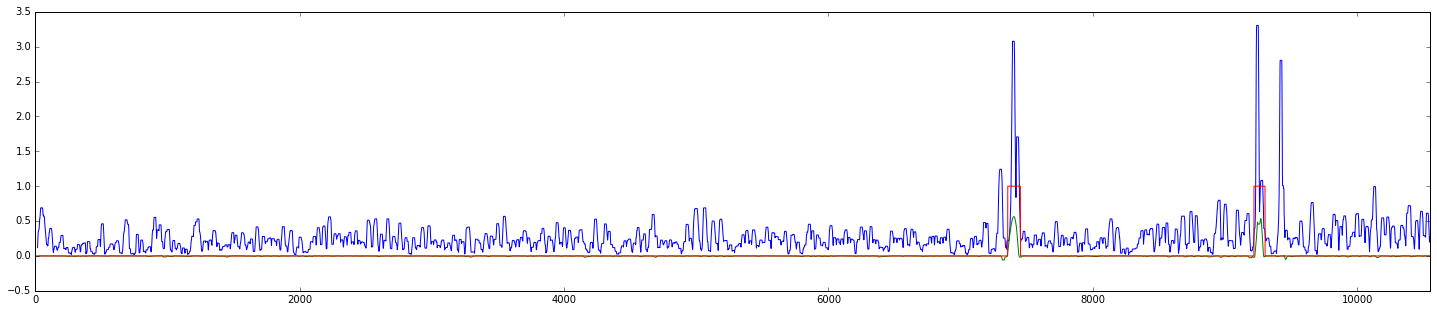

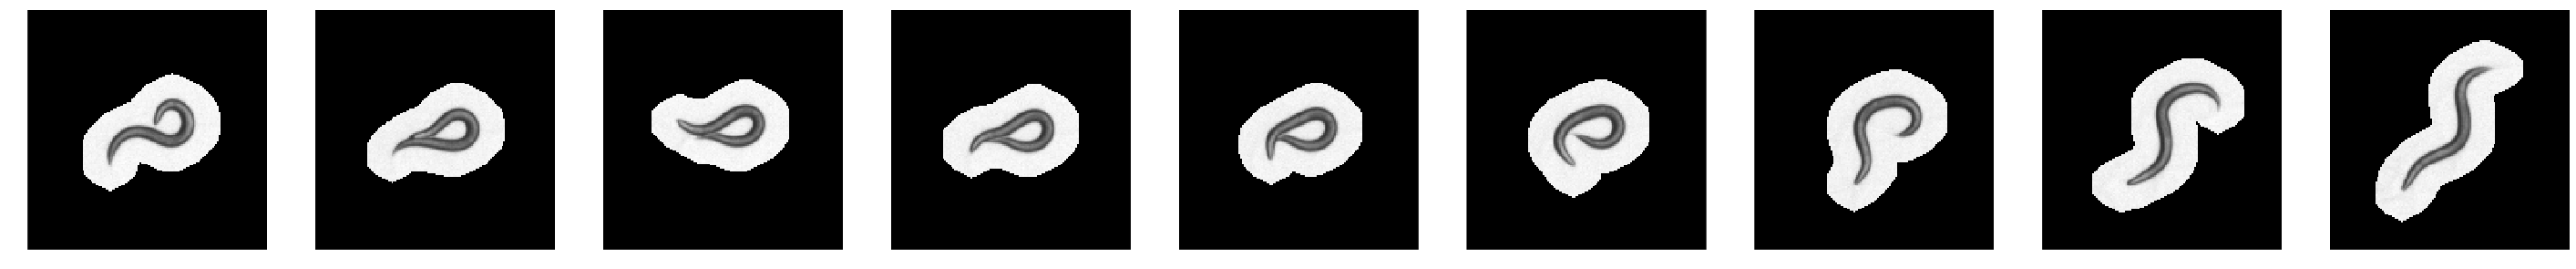

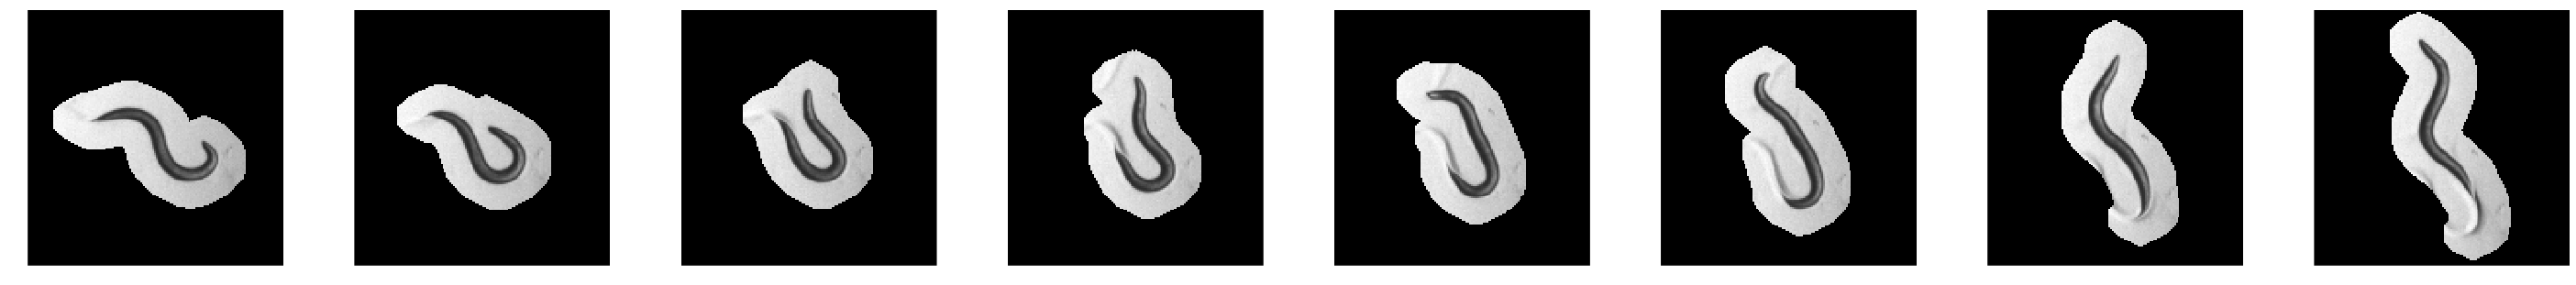

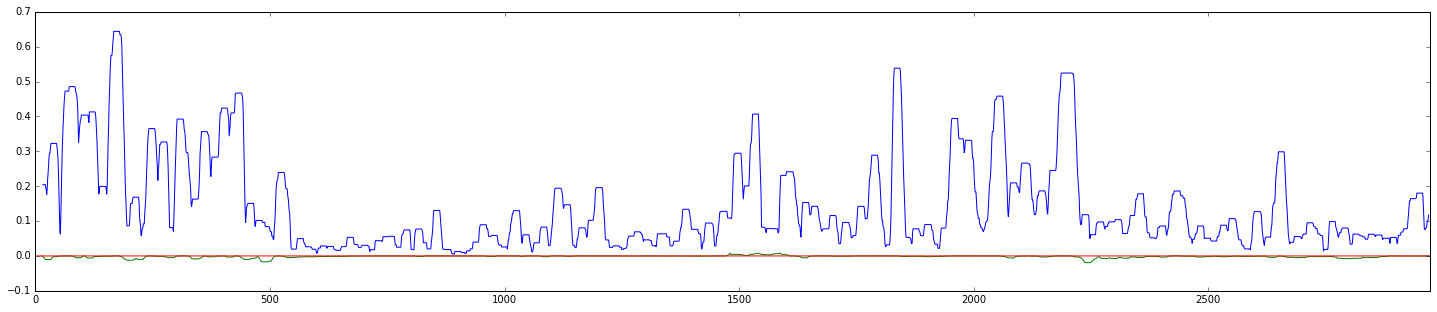

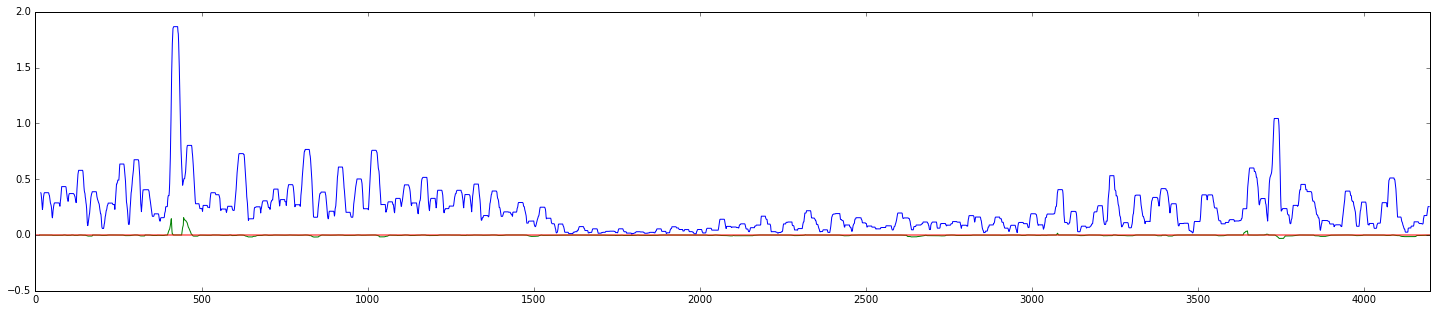

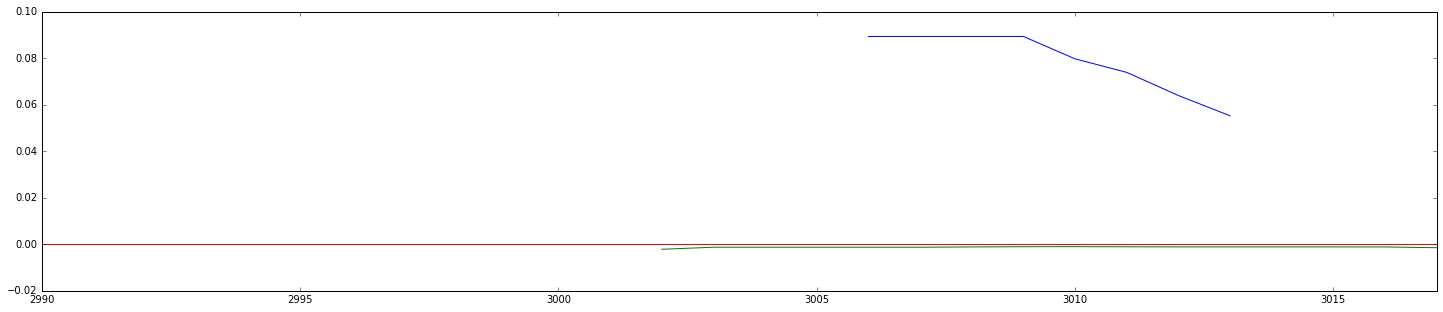

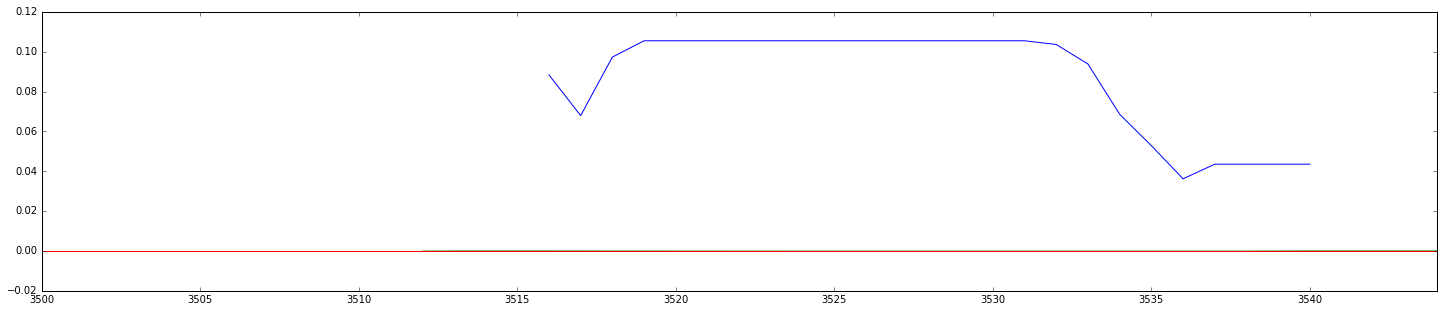

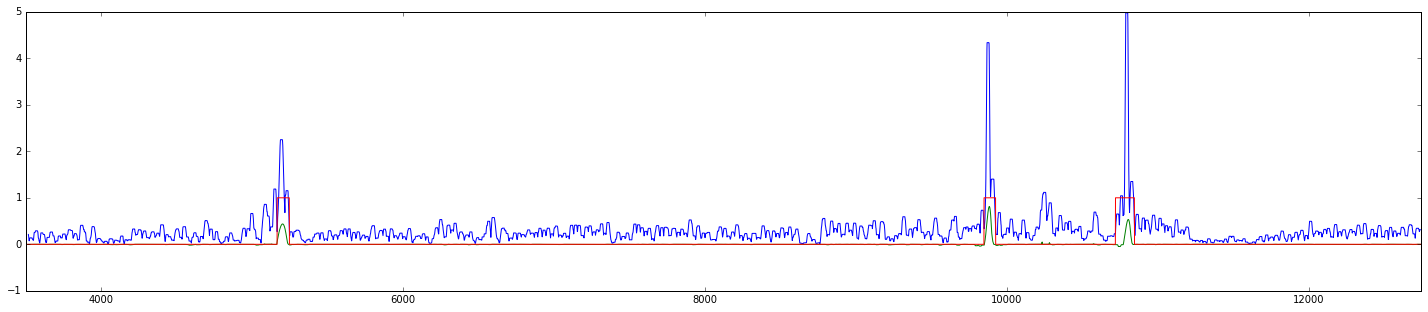

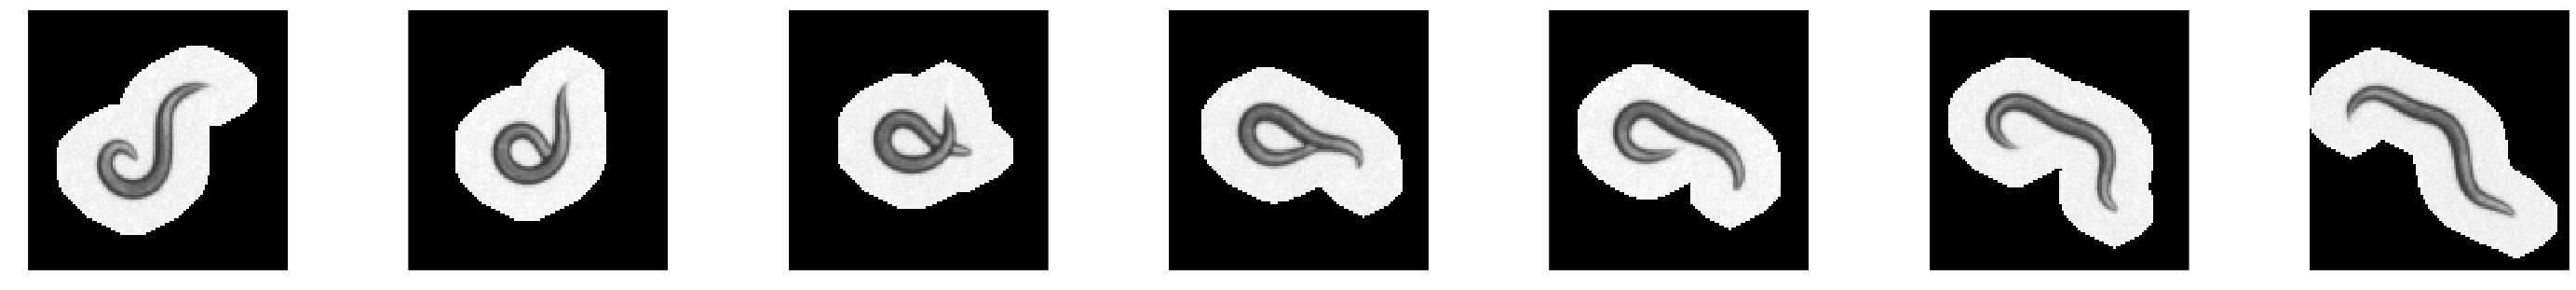

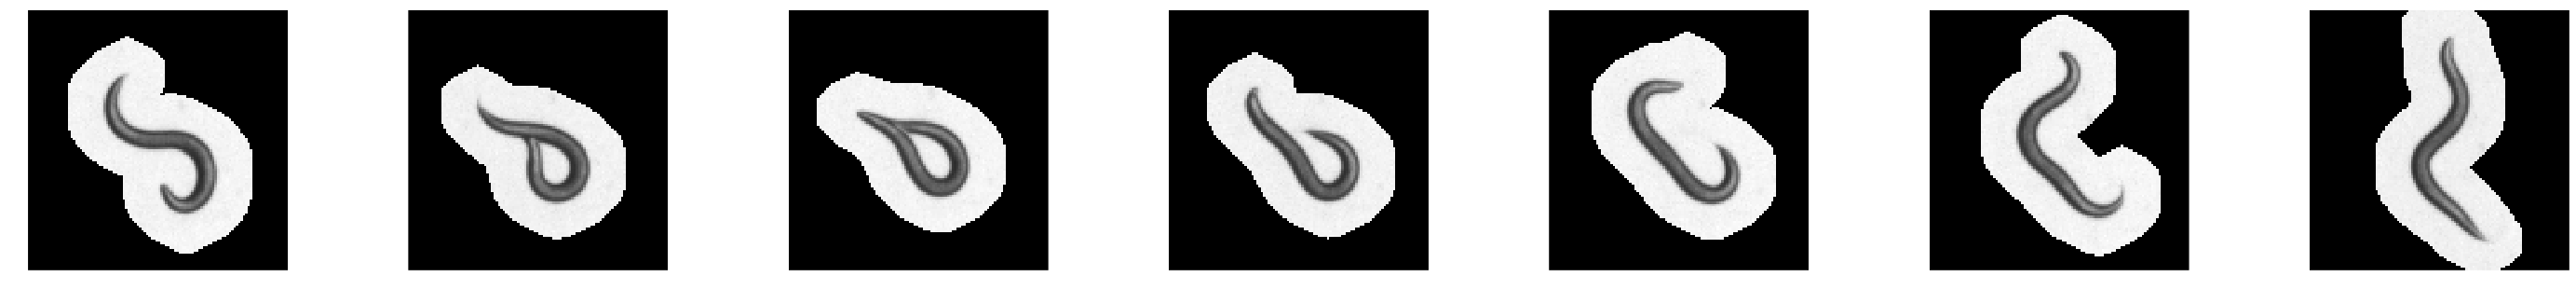

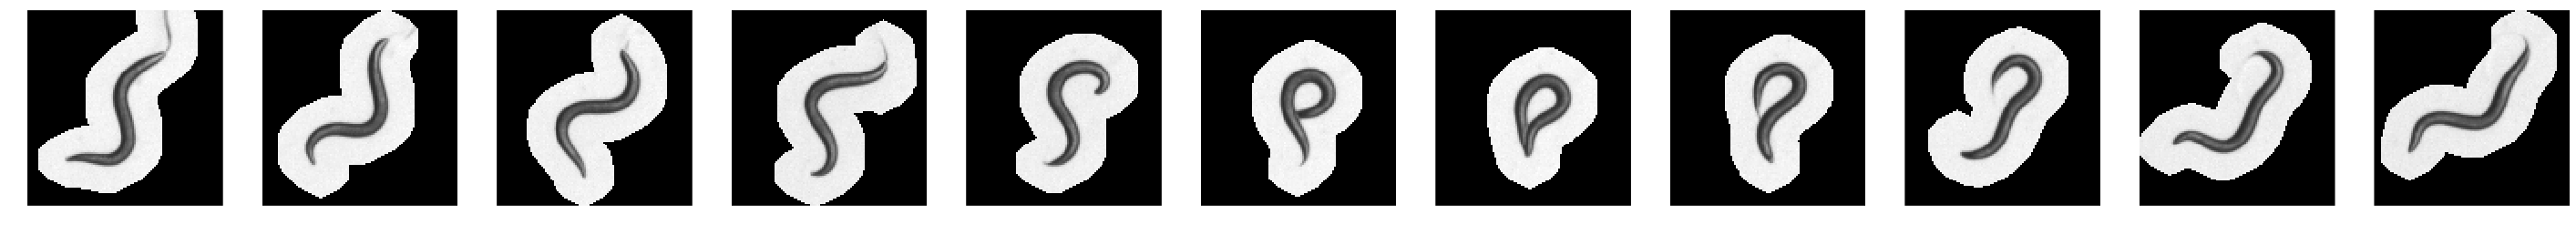

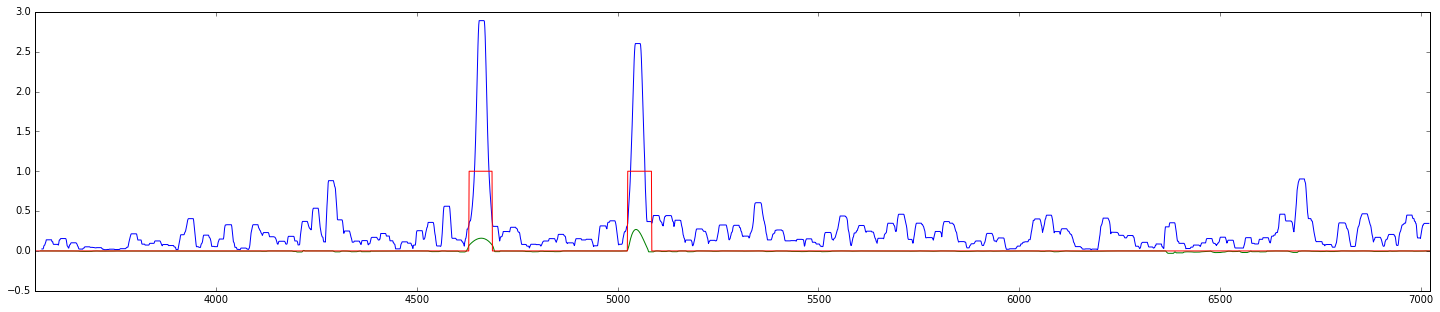

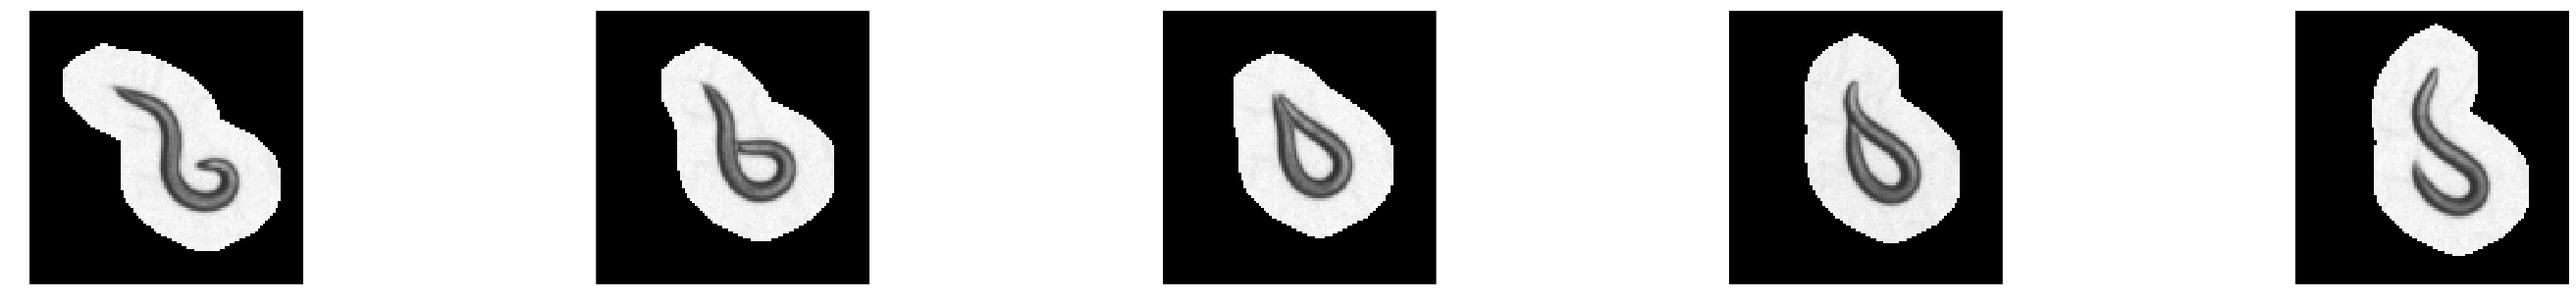

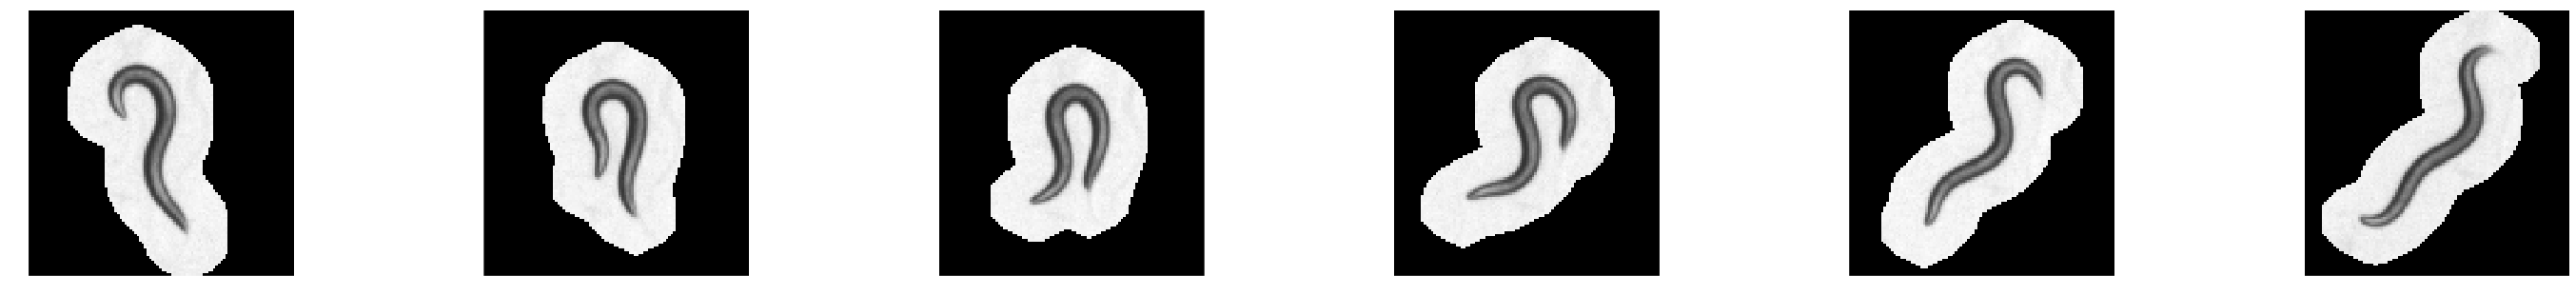

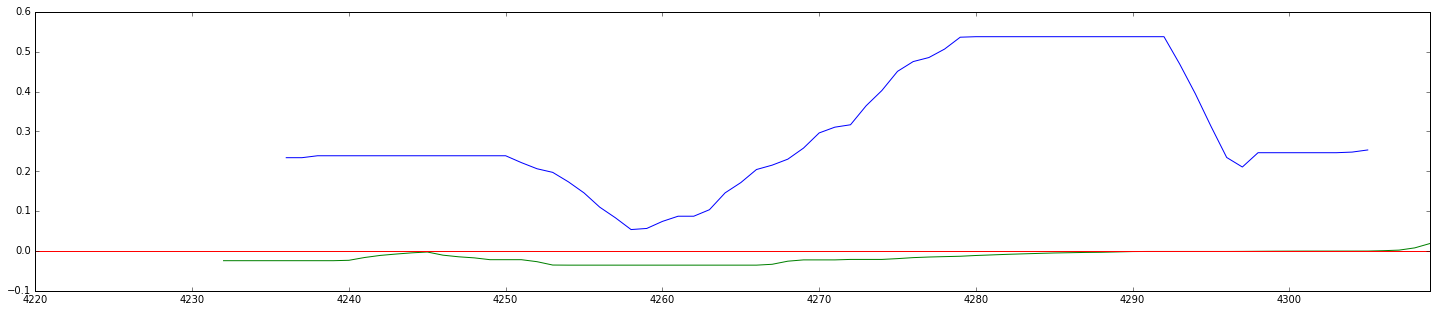

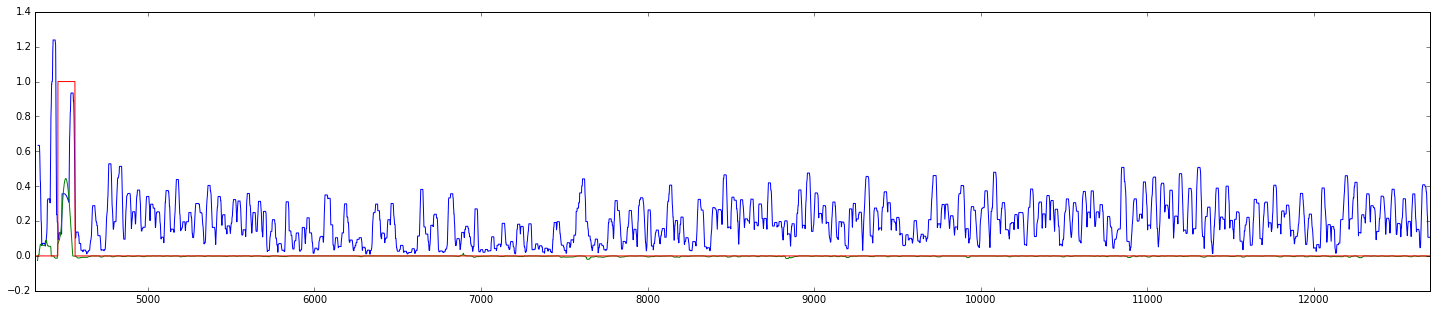

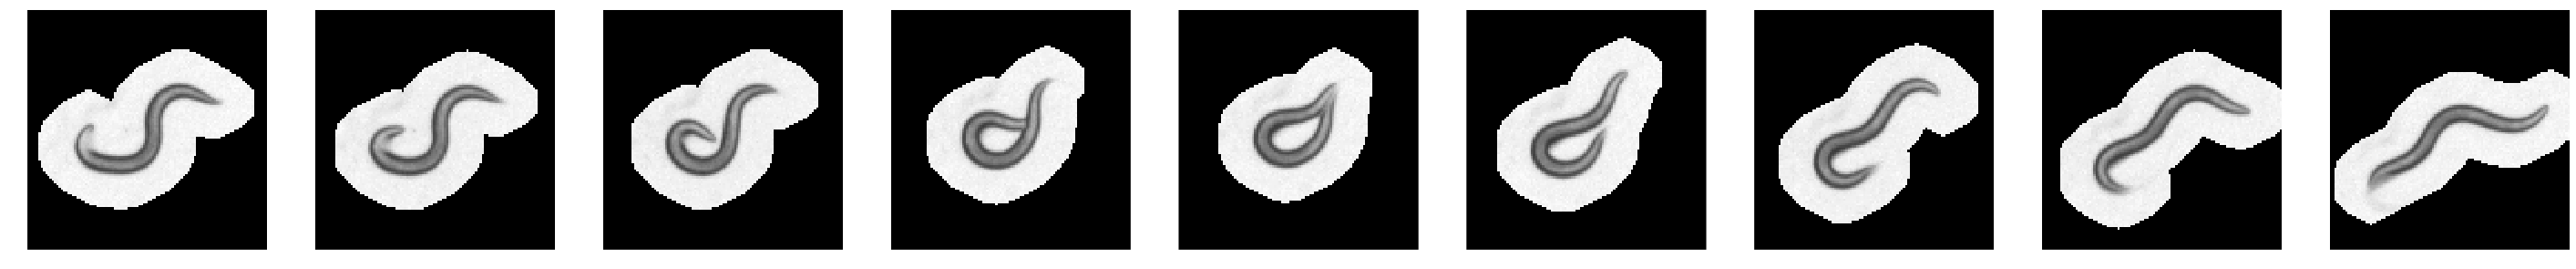

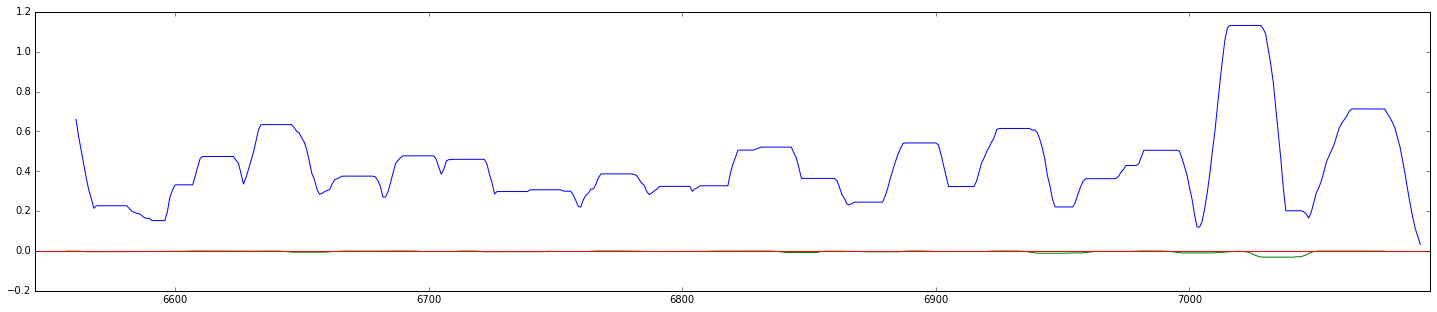

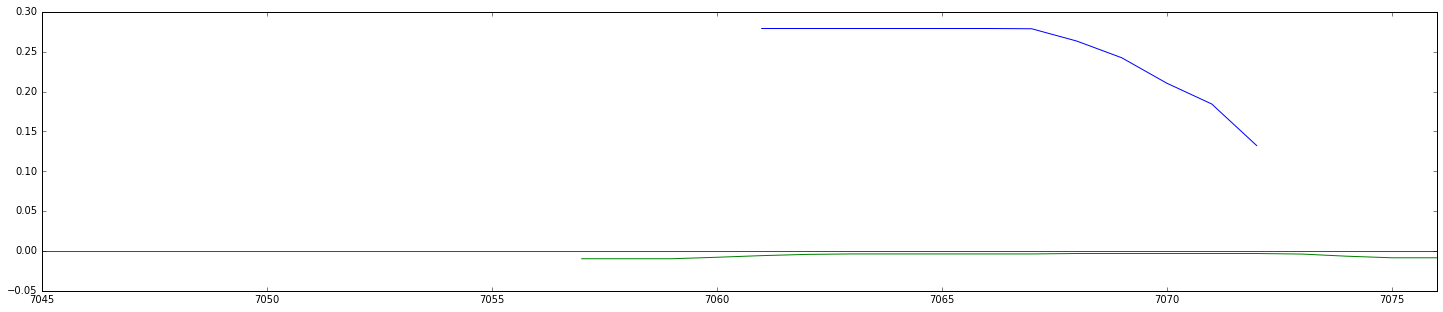

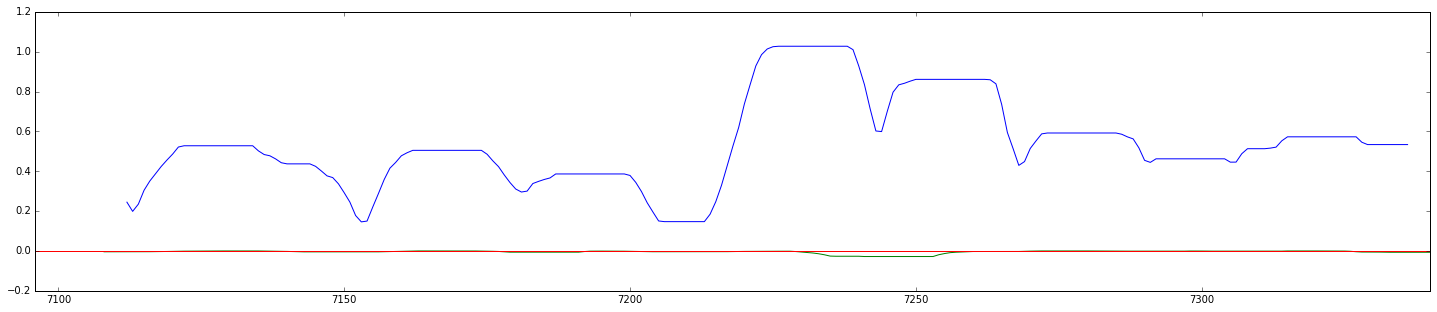

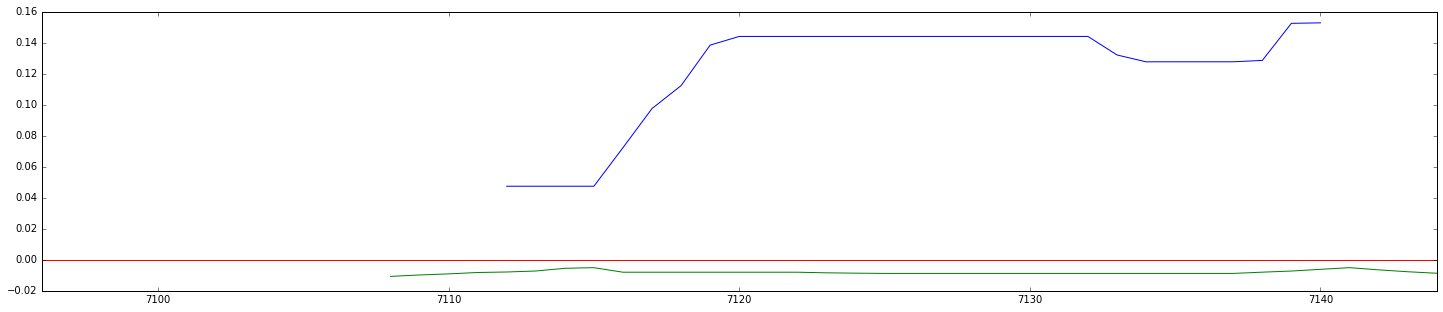

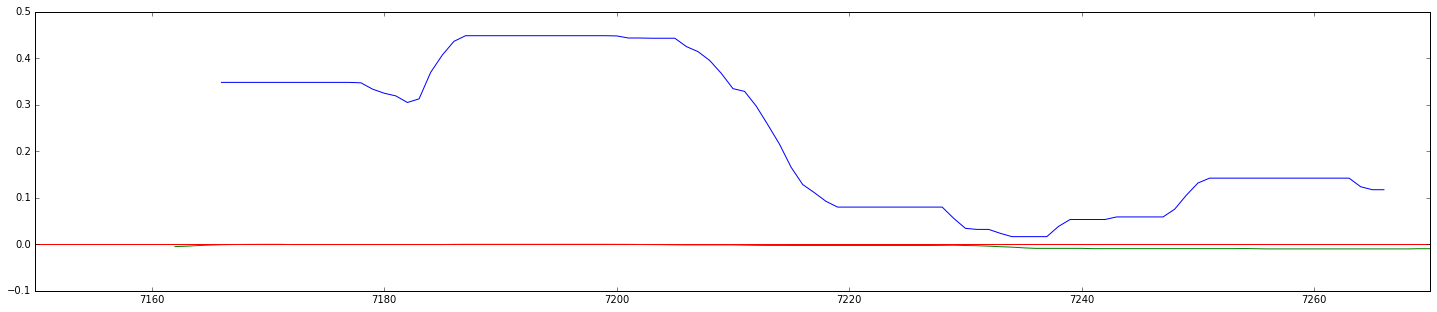

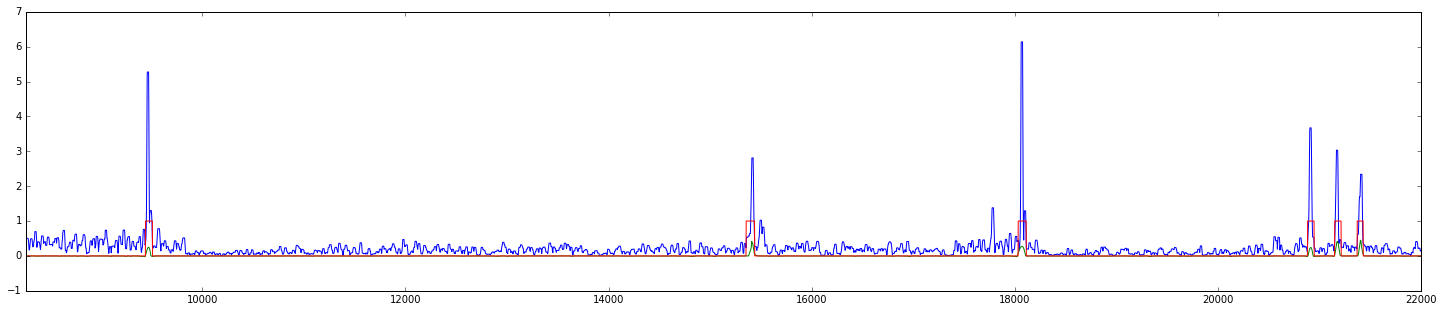

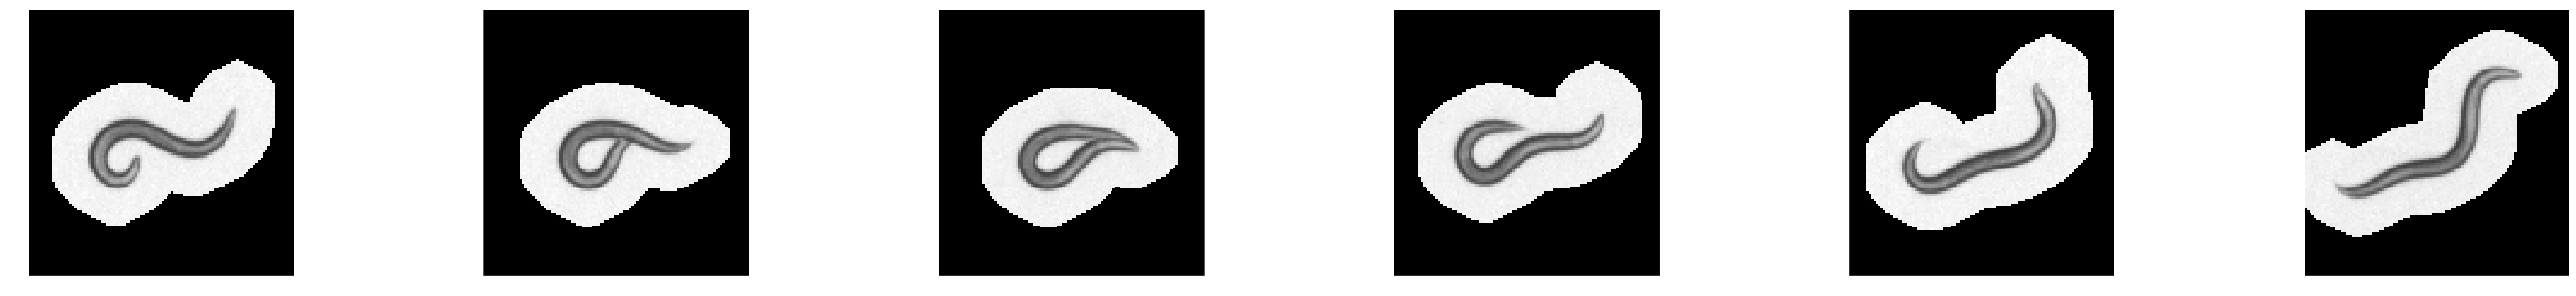

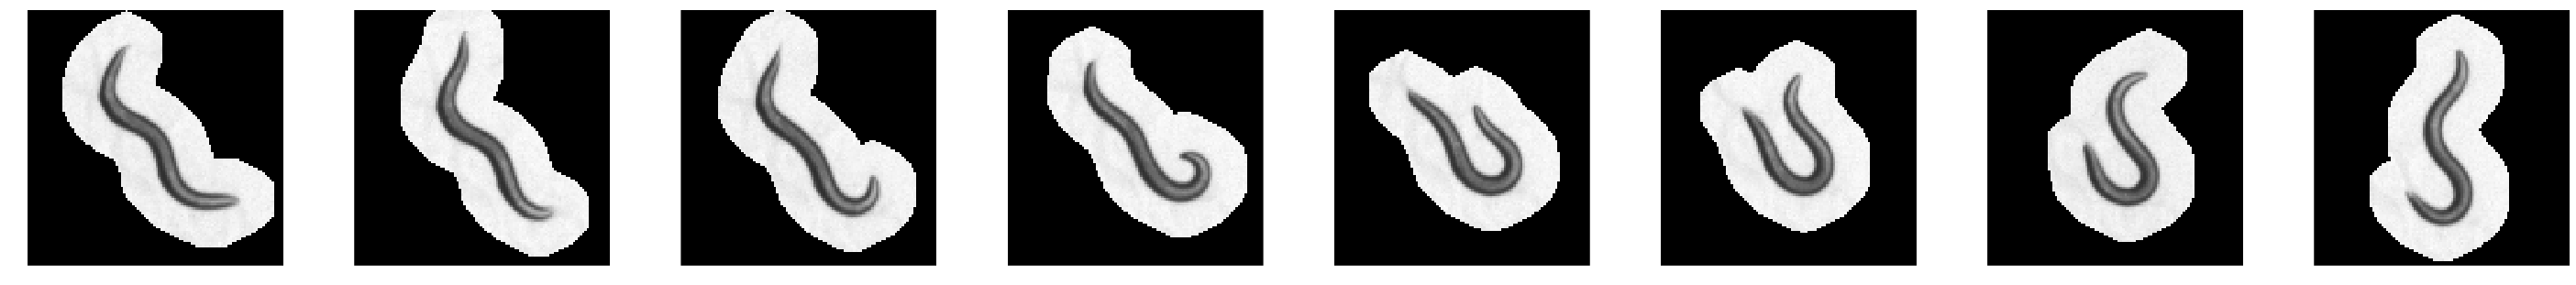

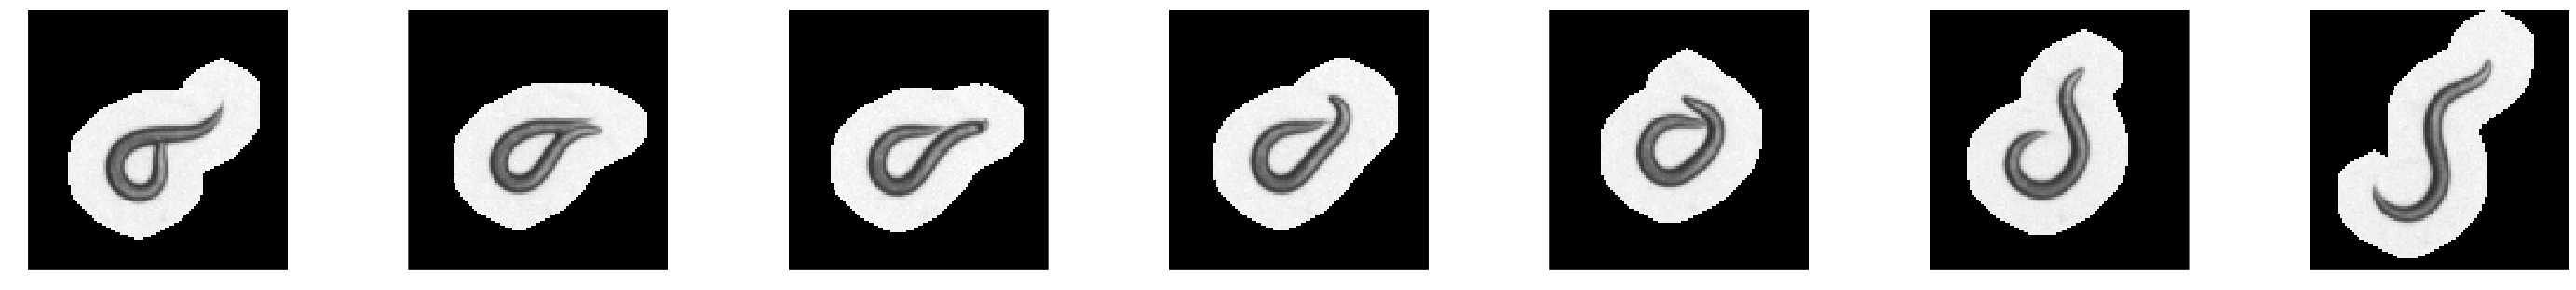

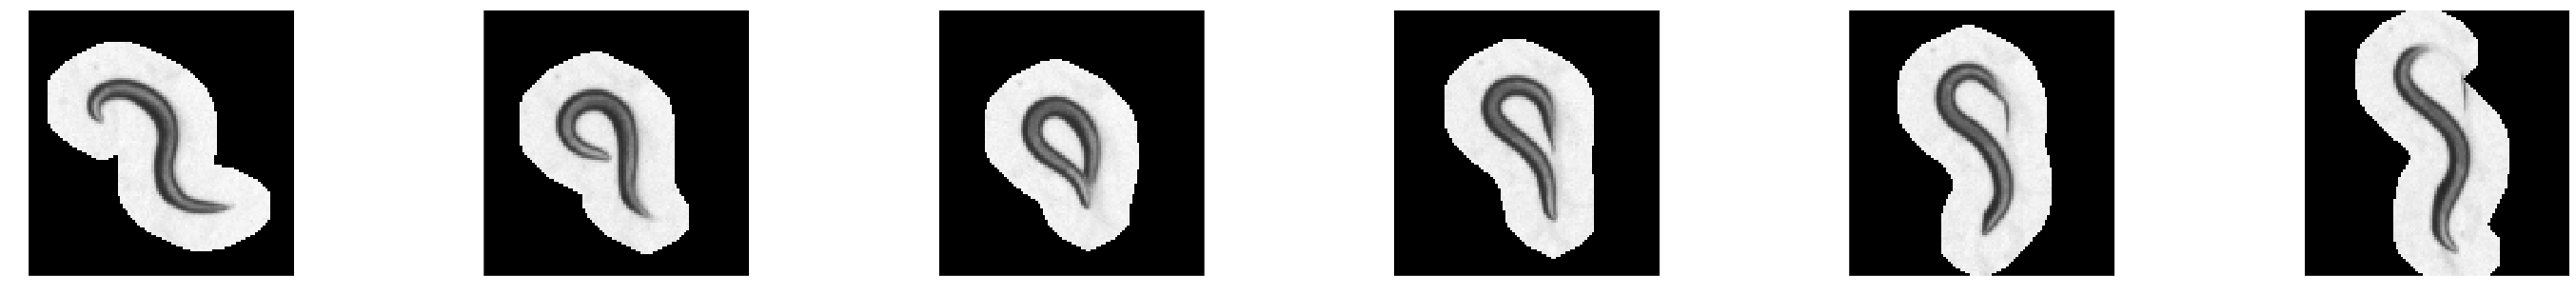

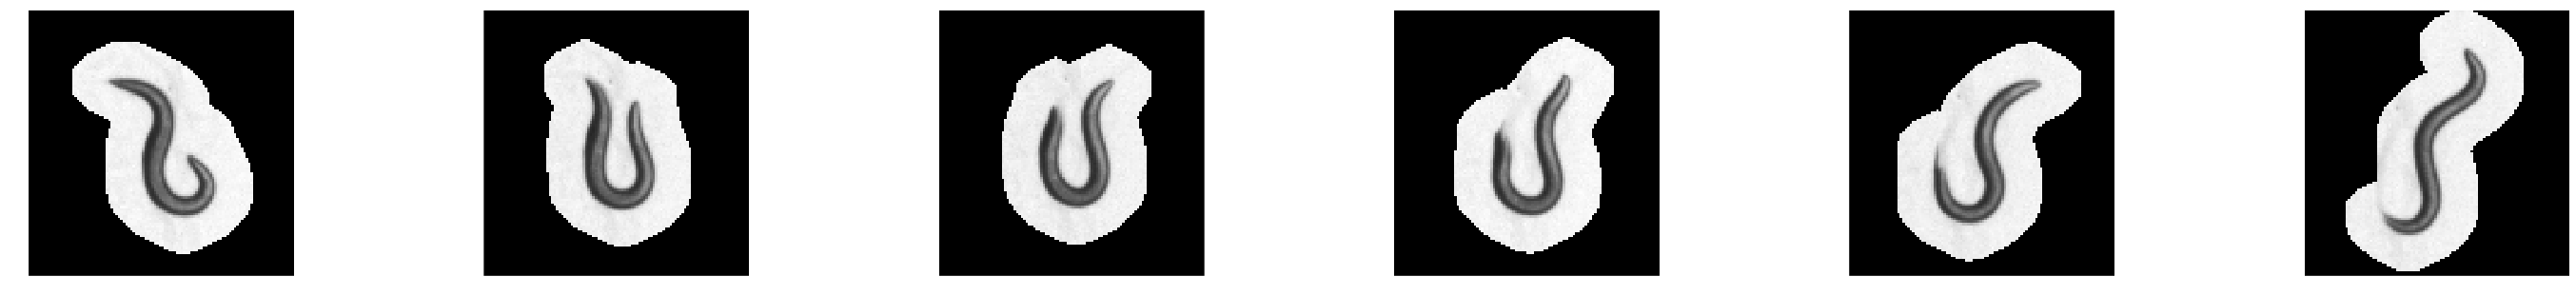

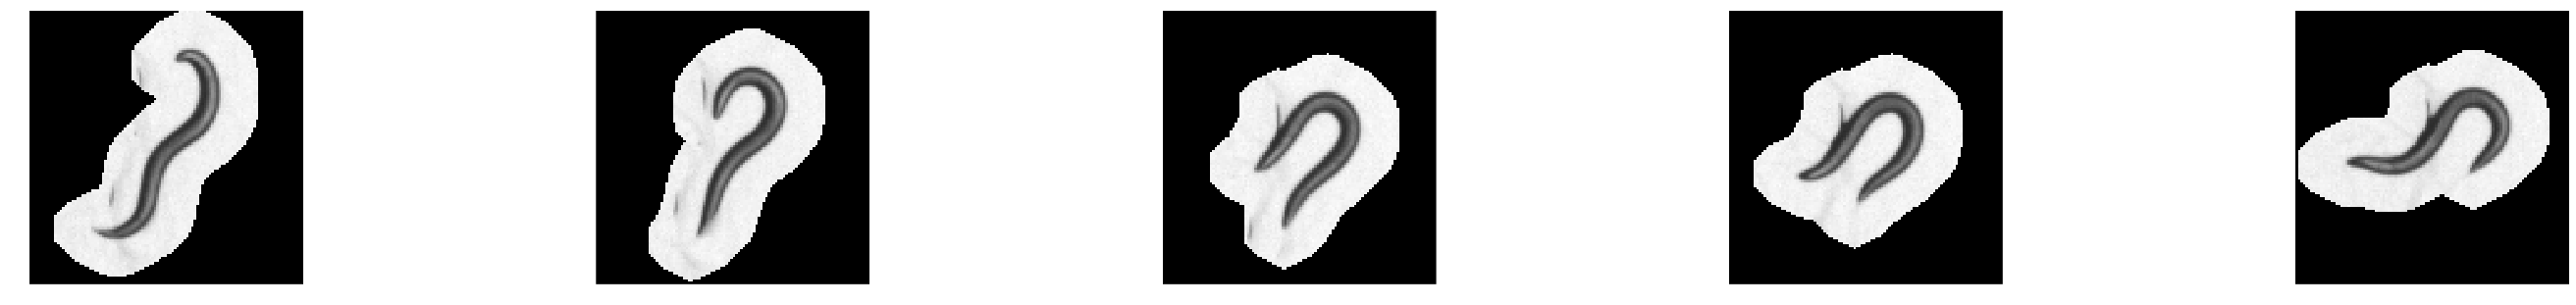

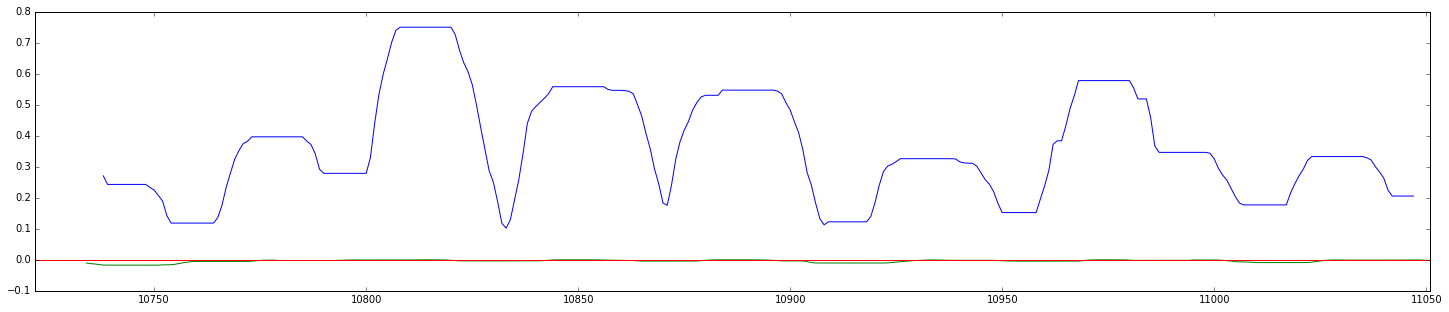

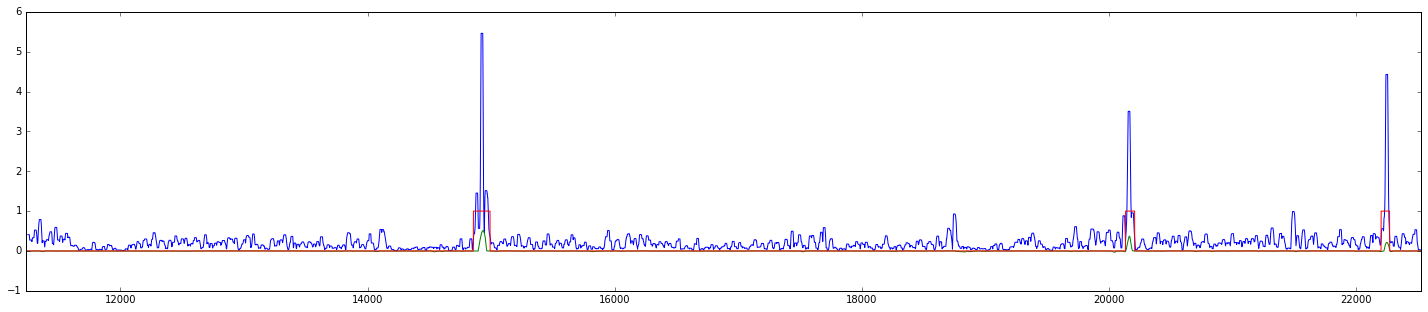

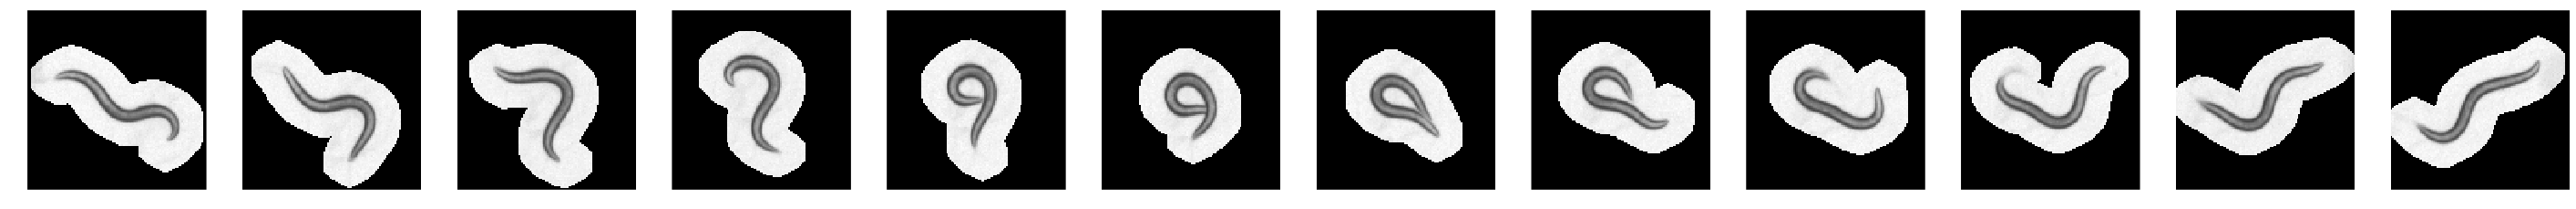

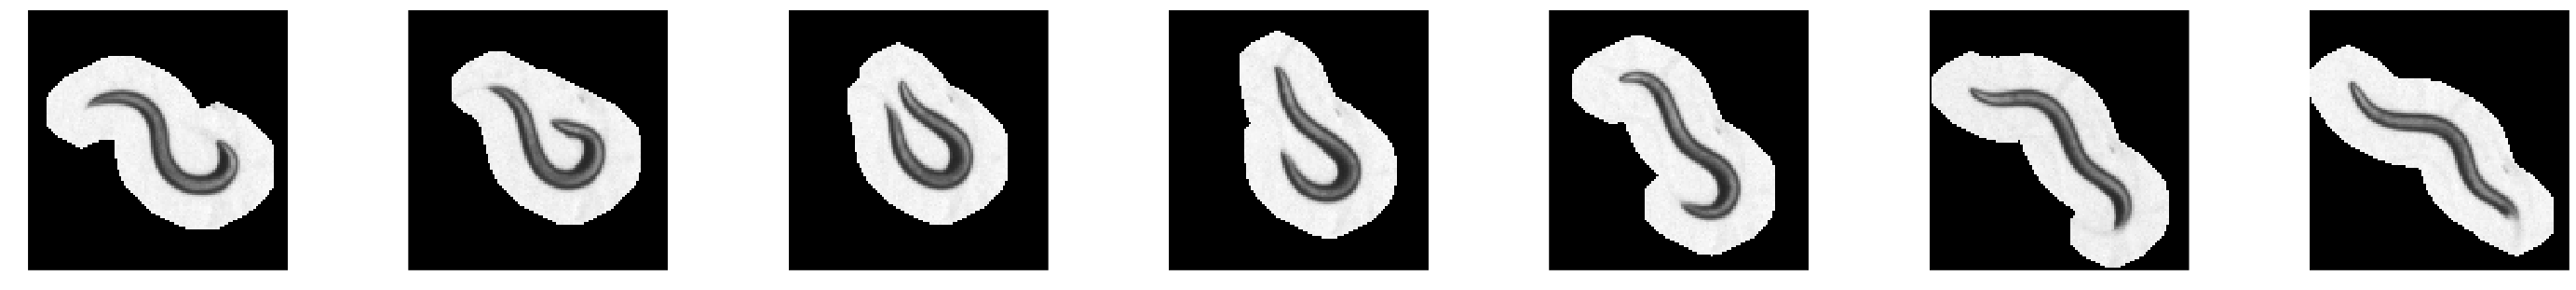

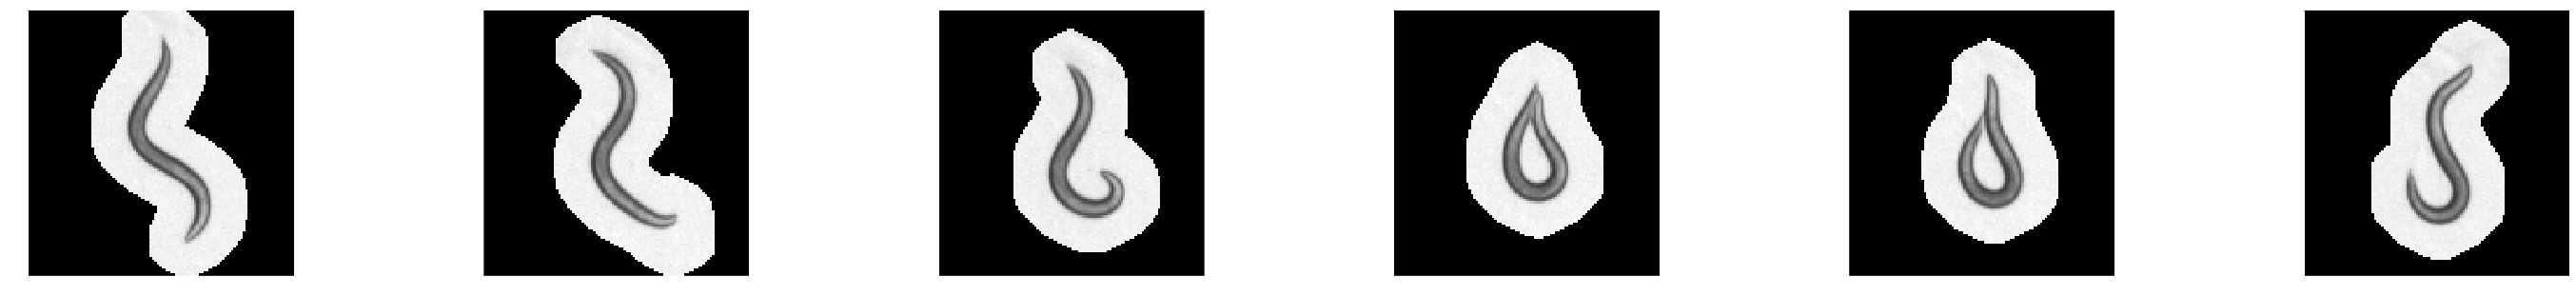

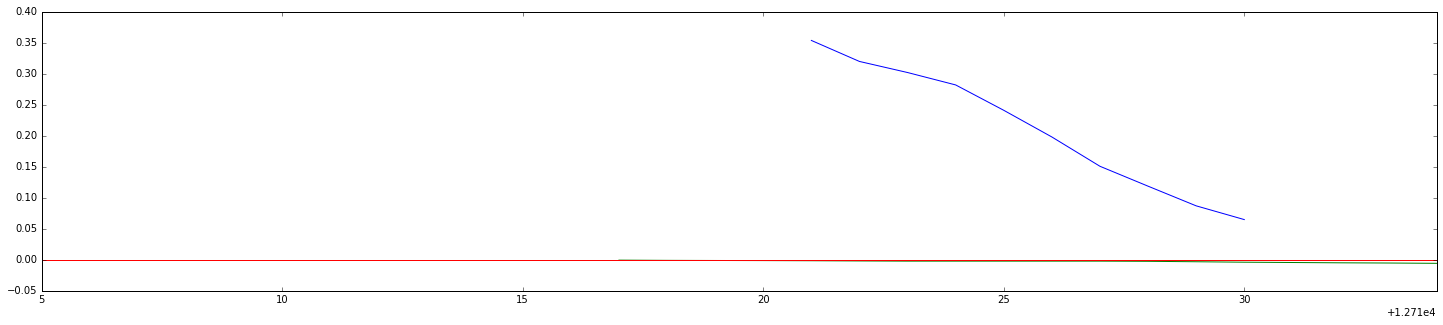

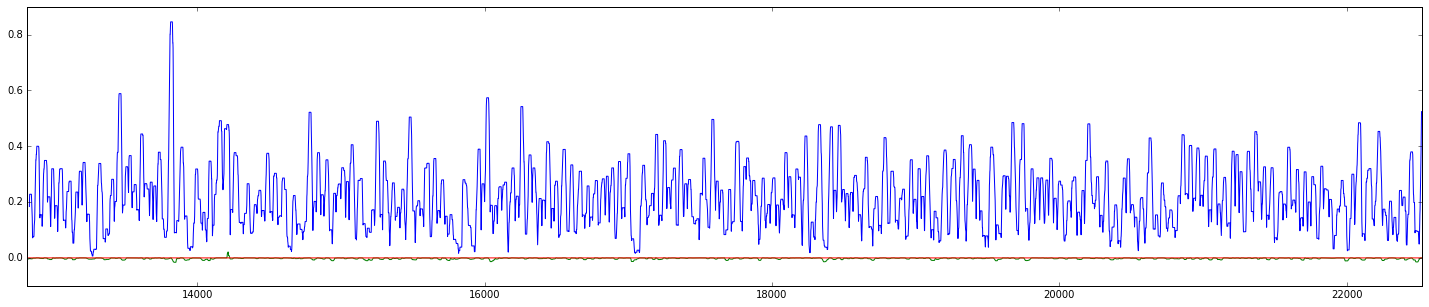

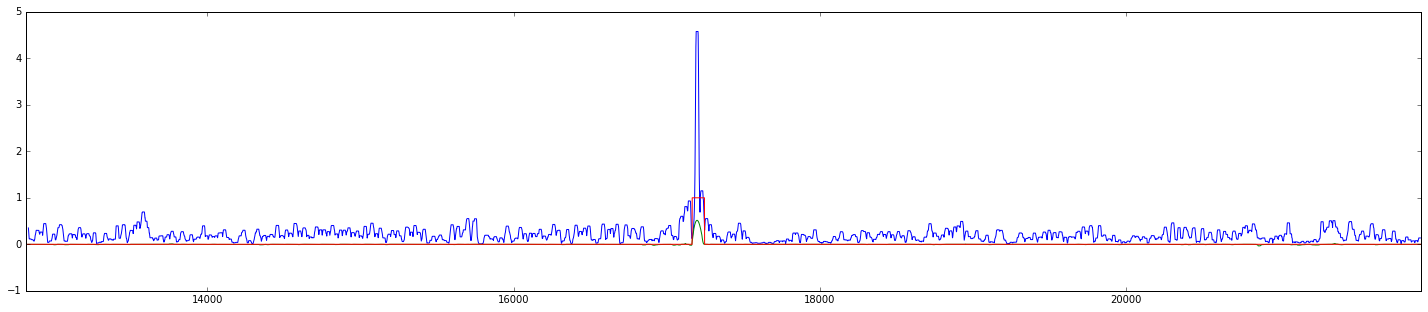

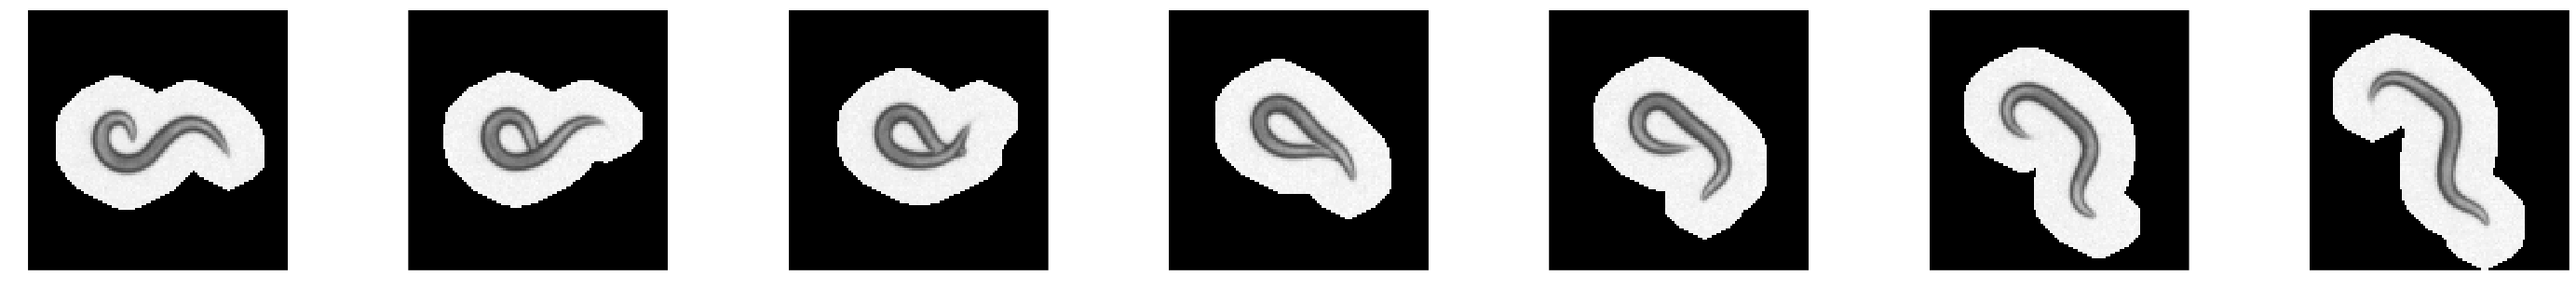

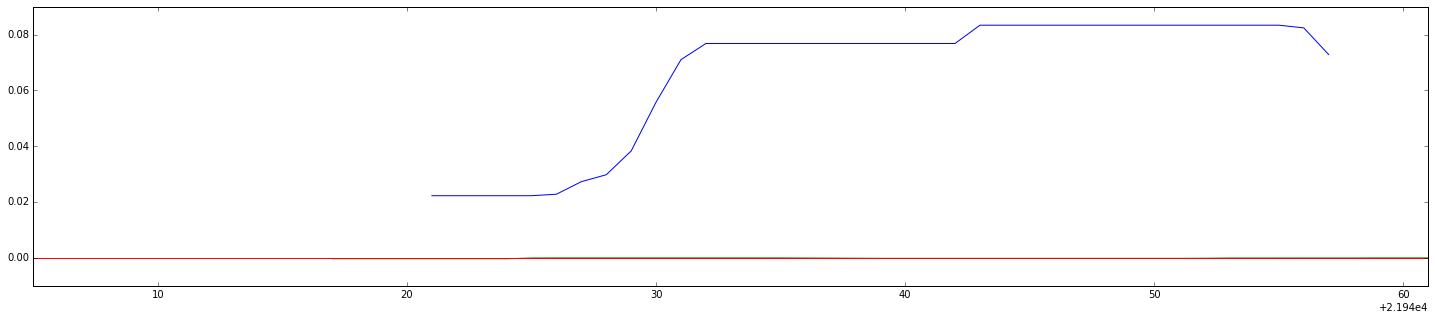

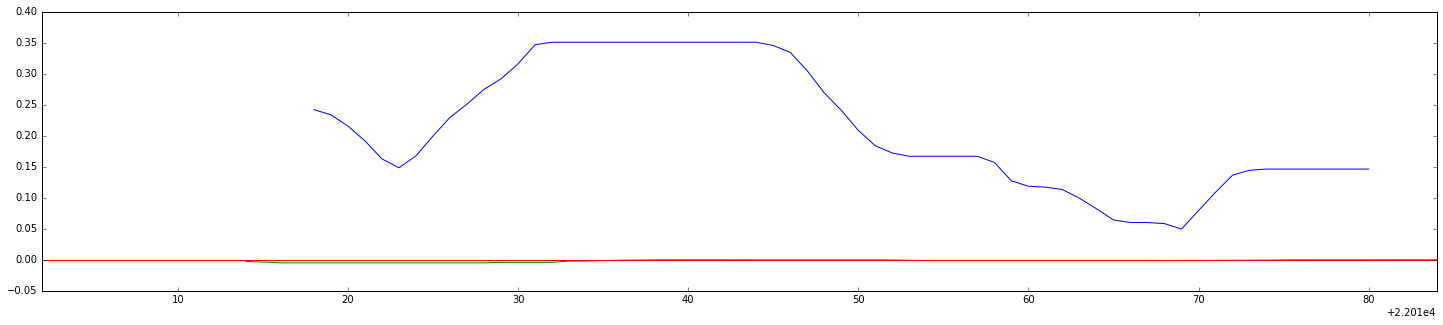

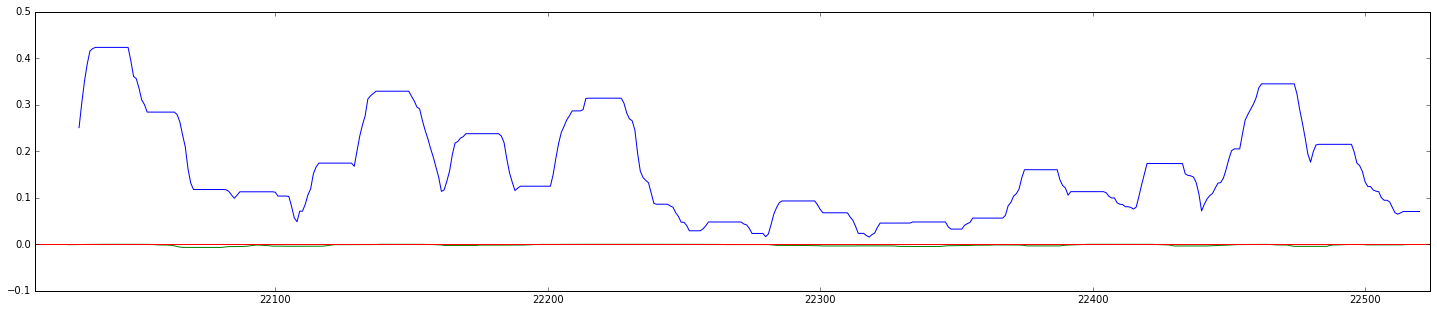

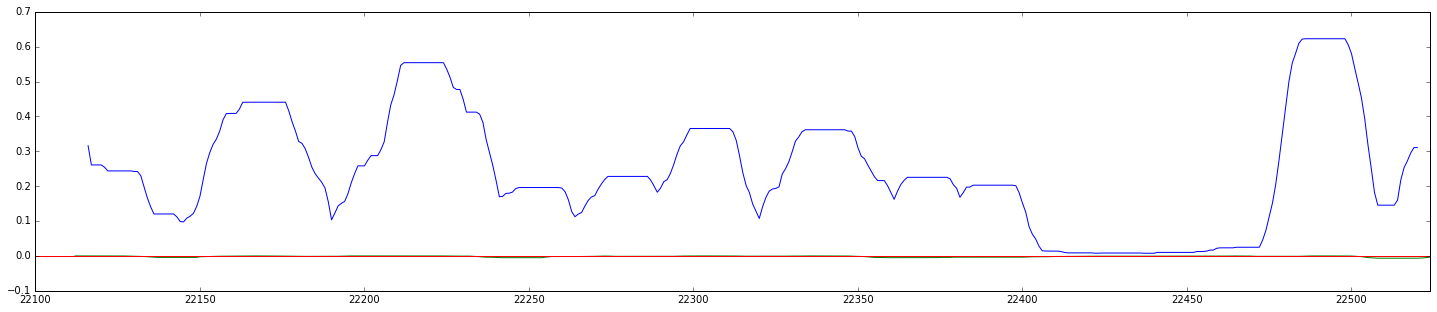

In [2]:
from tierpsy.analysis.ske_create.helperIterROI import  getROIfromInd

timeseries_features_g = timeseries_features.groupby('worm_index')

for worm_index, worm_data in timeseries_features_g:
    turns_vec, d_ratio, ang_velocity = find_turns(worm_data, fps)
    
    xx = worm_data['timestamp'].values
    
    plt.figure(figsize=(25,5))
    plt.plot(xx, ang_velocity)
    plt.plot(xx, d_ratio)
    plt.plot(xx, turns_vec)
    #plt.ylim((0.7, 1.1))
    plt.xlim((xx[0], xx[-1]))
    
    
    dd = _get_pulses_indexes(turns_vec, min_window_size=fps//2)
    pulse_ranges = list(zip(*dd))
    
    for p in pulse_ranges:
        
        dd = worm_data.loc[worm_data.index[p[0]:p[1]+1]]
        timestamps = dd['timestamp'][::12]
        plt.figure(figsize=(50, 5))
        for ii, tt in enumerate(timestamps):
            _, img, _ = getROIfromInd(masked_file, trajectories_data, tt, worm_index)
            
            plt.subplot(1, timestamps.size, ii+1)
            plt.imshow(img, cmap='gray', interpolation='none')
            plt.axis('off')